In [31]:
#Importing the required libraries for this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.pipeline import Pipeline

In [32]:
#load the data and see what the data looks like
df = pd.read_csv(r"C:\Users\User\Downloads\archive (1)\Credit_card.csv")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


From the initial dataframe, we can see that there is no target variable. In this supervised learning, a target variable is required for our machine model. Hence, we load in our target variable

In [33]:
#Next, load the target data
label = pd.read_csv(r"C:\Users\User\Downloads\archive (1)\Credit_card_label.csv")
label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [34]:
#merge both feature and target data using the LEFT Join
df = df.merge(label, on = "Ind_ID", how = "left")
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


Looking at the credit card dataset, we can see key attributes essential for evaluating creditcard worthiness and making approval decisions.

Typical characteristics in the dataset include: Ind_ID GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone EMAIL_ID, Type_Occupation. Family_Members, and the target column known as label.

The dataset consist of both categorical and Numerical features.

Next, we need to know more about the dataset.Let us explore the dataset.

Before exploration, some columns that would not be required for our training needs to be dropped

Afterwards, we then we label the training variables as X, and the target variable will be labelled y

In [35]:
X = df.drop(['Ind_ID', 'label', 'Birthday_count', 'Work_Phone', 'Phone', 'Family_Members'], axis=1)
y = df['label']
X

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,EMAIL_ID,Type_Occupation
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,365243,1,0,NaN
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,0,NaN
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,0,NaN
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-586,1,0,NaN
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-2182,1,0,Managers
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-1209,1,0,Accountants
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-2477,1,0,Managers
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-645,1,0,Drivers


Before proceeding with building our machine learning pipeline, There are some essential preprocessing steps also known as feature engineering. These remaining tasks can be categorized into:

1 Splitting the data into training and testing sets.

2 Data Preprocessing on the train data

3 Converting categorical data to numeric data using LabelEncoding.

4 Standardizing the feature values to ensure a consistent scale.

In [36]:
#Splitting data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("The X_train consist of", X_train.shape[0], "rows","and", X_train.shape[1], "columns")
print("The y_train consist of", y_train.shape[0], "rows")

The X_train consist of 1238 rows and 13 columns
The y_train consist of 1238 rows


DATA PREPROCESSING

In [37]:
#using the .info() command to know the data types of each column 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 680 to 1126
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1232 non-null   object 
 1   Car_Owner        1238 non-null   object 
 2   Propert_Owner    1238 non-null   object 
 3   CHILDREN         1238 non-null   int64  
 4   Annual_income    1222 non-null   float64
 5   Type_Income      1238 non-null   object 
 6   EDUCATION        1238 non-null   object 
 7   Marital_status   1238 non-null   object 
 8   Housing_type     1238 non-null   object 
 9   Employed_days    1238 non-null   int64  
 10  Mobile_phone     1238 non-null   int64  
 11  EMAIL_ID         1238 non-null   int64  
 12  Type_Occupation  838 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 135.4+ KB


In [38]:
#Next, check null values
X_train.isnull().sum()

GENDER               6
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       16
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Employed_days        0
Mobile_phone         0
EMAIL_ID             0
Type_Occupation    400
dtype: int64

The train data consist of 422 null values. dropping these null values implies less train data.

Solution:

To resolve this, the categorical null values are replaced with the mode of the categorical column and the numerical null values are replaced with the mean of the numerical column

In [56]:
#replace the Nan values of categorical features by calculating the mode and filling the missing 
#columns with the mode respectively
X_train['Type_Occupation'].fillna(X_train['Type_Occupation'].mode()[0], inplace=True)
X_train['GENDER'].fillna(X_train['GENDER'].mode()[0], inplace=True)

#Afterwards, replace the missing numerical features with the mean of each numerical 
#column respectively
X_train['Annual_income'].fillna(X_train['Annual_income'].mean(), inplace=True)

X_train.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_12932\232423628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Type_Occupation'].fillna(X_train['Type_Occupation'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12932\232423628.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Mobile_phone       0
EMAIL_ID           0
Type_Occupation    0
dtype: int64

In [57]:
#Describe the train Dataset. 
X_train.describe()

,CHILDREN,Annual_income,Employed_days,Mobile_phone,EMAIL_ID
count,1238.000000,1.238000e+03,1238.000000,1238.0,1238.000000
mean,0.421648,1.947708e+05,59141.831179,1.0,0.092892
std,0.804142,1.169647e+05,137628.381940,0.0,0.290398
min,0.000000,3.375000e+04,-14887.000000,1.0,0.000000
25%,0.000000,1.260000e+05,-3191.000000,1.0,0.000000
50%,0.000000,1.800000e+05,-1568.000000,1.0,0.000000
75%,1.000000,2.250000e+05,-454.250000,1.0,0.000000
max,14.000000,1.575000e+06,365243.000000,1.0,1.000000


FEATURE ENGINEERING
 Feature Engineering is an important procedure in developing a machine learning pipeline because by normalizing and scaling, it ensures that all features in the dataset are of similar scale. For this pipeline, the ColumnTransformer would be used to perform scaling and Normalization. 

In [58]:
#Scaling and encoding the train data
CT = ColumnTransformer(transformers=[('num', StandardScaler(), selector(dtype_include=['float64', 'int64'])), 
                                     ('cat', OneHotEncoder(), selector(dtype_include='category'))])
# Now, you can fit and transform your data
x_train_scaled = CT.fit_transform(X_train)
x_test_scaled = CT.fit_transform(X_test)
x_train_scaled

array([[-0.52455662,  0.06610778,  2.22501251,  0.        , -0.32000668],
       [ 1.9635702 , -0.31877904, -0.44171404,  0.        , -0.32000668],
       [ 0.71950679,  1.79809846, -0.43285328,  0.        ,  3.12493478],
       ...,
       [ 1.9635702 , -0.70366586, -0.43147219,  0.        , -0.32000668],
       [-0.52455662, -0.203313  , -0.45790184,  0.        , -0.32000668],
       [-0.52455662, -0.70366586, -0.43356563,  0.        , -0.32000668]],
      shape=(1238, 5))

Another crucial aspect is to check for imbalancing

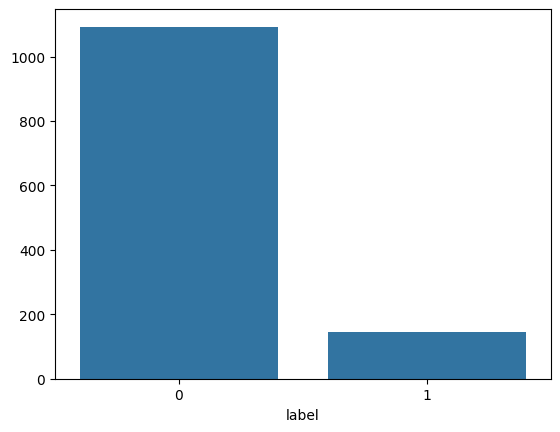

In [59]:
Imba =y_train.value_counts()
sns.barplot(x = Imba.index, y = Imba.values)
plt.show()

The data appears to be highly imbalanced

Solution: Apply SMOTE to balance data

In [60]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train_scaled, y_train)

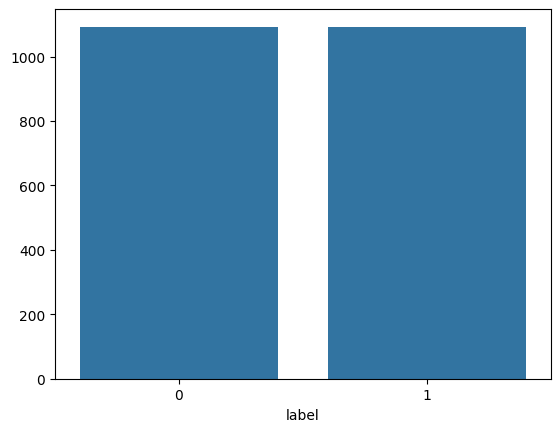

In [61]:
Imba =y_train_resampled.value_counts()
sns.barplot(x = Imba.index, y = Imba.values)
plt.show()

MODEL BUILDING AND HYPERPARAMETER TUNING


The problem is a classification problem, Hence the DecisionTreeClassifier, RandomForestClassifier and GradientBoosting is used to train the model. For training:

1 We Created a dictionary named models, defining the 3 classification algorithms with their respective parameter grids

2 We performed gridsearchCV by iterating over each model in the dictionary

3 After fitting each gridsearchCV object, we store the best validation score in the best_scores dictionary

4 Finally, we find the model with the hidghest validation score using the max function

In [62]:
# Definining models and their respective parameter grids
models = {
    'DecisionTree': (DecisionTreeClassifier(), {"criterion" : ["gini", "entropy"],
                  "splitter": ["best", "random"],
                  "max_depth" : [None, 80, 90, 100, 120, 130, 150],
                  "min_samples_split" : [2, 5, 10],
                  "min_samples_leaf": [1, 2, 4]}),
    'RandomForest': (RandomForestClassifier(), {"n_estimators" : [8, 16, 32, 64, 128, 256],
                    "max_features" : [1, 2, 3],
                    "bootstrap" : [True, False]}),
    'GradientBoosting': (GradientBoostingClassifier(), {"n_estimators": [30, 60, 90, 120, 150],
                 "learning_rate": [0.01, 0.1, 0.2, 0.4, 0.6],
                 "max_depth": [1, 3, 5, 7]})
}

In [63]:
# Perform grid search for each model
best_scores = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_scores[model_name] = grid_search.best_score_

In [64]:
# next, find the best model based on the best_scores
best_model = max(best_scores, key=best_scores.get)
best_score = best_scores[best_model]

print(" The Best Model is :", best_model)
print(" The Validation Score of this model is:", best_score)

 The Best Model is : GradientBoosting
 The Validation Score of this model is: 0.8252844738409454


EVALUATION OF THE MODEL WITH THE BEST SCORE

In [65]:
#First we get the best model instance based on the selected model name
best_model_instance = models[best_model][0]

#next we Fit the best model on the entire training data
best_model_instance.fit(X_train_resampled, y_train_resampled)

# then we make predictions on the test data
y_pred = best_model_instance.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("The Accuracy of The Best Model=", accuracy)
print("Precision of The Best Model=", precision)
print("Recall of The Best Model=", recall)
print("F1-Score of The Best Model=", f1)
print("Confusion Matrix of The Best Model:\n", con_mat)
print("Classification Report of The Best Model:\n", cr)

The Accuracy of The Best Model= 0.5903225806451613
Precision of The Best Model= [0.94219653 0.1459854 ]
Recall of The Best Model= [0.58214286 0.66666667]
F1-Score of The Best Model= [0.7196468  0.23952096]
Confusion Matrix of The Best Model:
 [[163 117]
 [ 10  20]]
Classification Report of The Best Model:
               precision    recall  f1-score   support

           0       0.94      0.58      0.72       280
           1       0.15      0.67      0.24        30

    accuracy                           0.59       310
   macro avg       0.54      0.62      0.48       310
weighted avg       0.87      0.59      0.67       310



Text(0.5, 23.52222222222222, 'Predicted label')

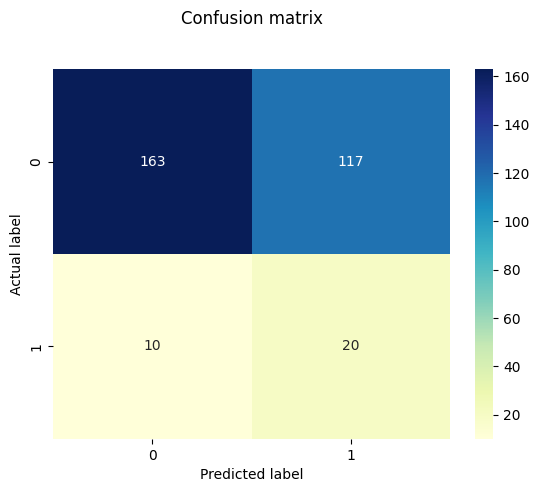

In [66]:
p = sns.heatmap(pd.DataFrame(con_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

CONCLUSION

The pipeline proposed solving a business problem of predicting whether a customer is eligible for a credit card or not

Strength of the proposed solution:

The Strength of the proposed solution lies in its ability to accurately predict credit card eligibility.

Limitations:

The Limitations to this project is in the content of the dataset.

Implication of Result on Business Problem:

It has a positive impact for financial institutions,as it helps them understand factors that contribute to credit card approval and identify customers eligibility for a credit card

Data-Driven Recommendations:

Segment credit-card applicants based on model features

Model Explainabilty:

In this business problem, we not only require a highly explainable model, it is required that the model has a high level of accuracy.The GradientBoosting model creates a balance between interpretabilty and accuracy. Hence, this model has been accurately been able to predict customers' eligibility for a credit-card